In [8]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [9]:
x  = '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA'),
 PosixPath('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL'),
 PosixPath('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/.DS_Store')]

In [10]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

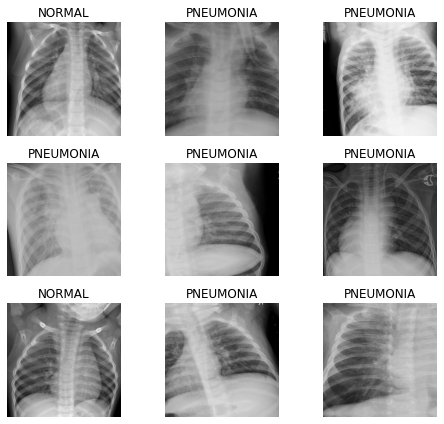

In [11]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)


In [12]:
print(data.classes)
len(data.classes)
data.c

['NORMAL', 'PNEUMONIA']


2

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


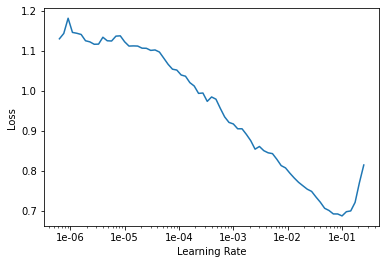

In [15]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [16]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.472991,0.649785,0.905082,03:28
1,0.353004,0.123354,0.971237,03:27
2,0.212525,0.048573,0.979866,03:27
3,0.109511,0.056471,0.976989,03:27


In [17]:
# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.075611,0.043828,0.986577,03:27
1,0.079276,0.067845,0.974113,03:27
2,0.093769,0.362580,0.943432,03:28
3,0.215604,3.520949,0.791946,03:26
4,0.522224,1.064933,0.910834,03:28
5,0.690708,0.498410,0.931927,03:28
6,0.306057,0.064001,0.978907,03:27
7,0.171551,0.150933,0.955896,03:26
8,0.102346,0.158305,0.966443,03:28
9,0.098553,0.074125,0.980825,03:27


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.055474,0.060455,0.981783,03:30
1,0.082605,1.681223,0.726750,03:29
2,0.078956,0.033915,0.985618,03:31
3,0.067926,0.327371,0.924257,03:32
4,0.063681,0.204211,0.949185,03:30
5,0.062663,0.031961,0.989453,03:31
6,0.047099,0.131673,0.966443,03:32
7,0.046738,0.051910,0.982742,03:35
8,0.036543,0.038336,0.984660,03:32
9,0.033505,0.053349,0.983701,03:31


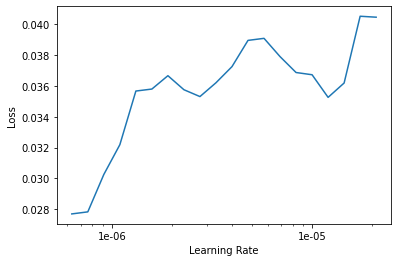

In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

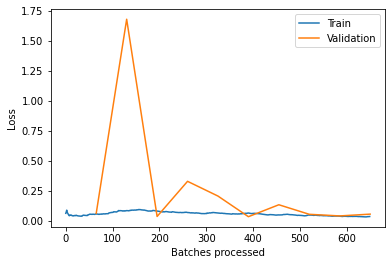

In [19]:
learn.recorder.plot_losses()


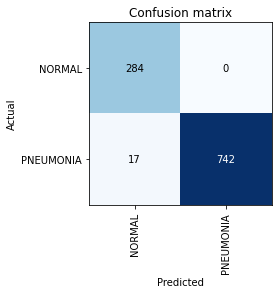

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
img = open_image('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg')
print(learn.predict(img)[0])

PNEUMONIA


In [22]:
learn.export(file = Path("/kaggle/working/export.h5"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>